In [2]:
# Import librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("C:/bikes_data.csv")


In [4]:
df

,bike_name,model price,city,kms_driven,owner,age,bike_model,cc
0,Bajaj Pulsar 180cc,13000,Mansa,28881,First Owner,13,Bajaj Pulsar,180cc
1,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
2,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
3,Bajaj Pulsar 180cc,16000,Ludhiana,36500,First Owner,13,Bajaj Pulsar,180cc
4,Bajaj Pulsar 180cc,18000,Kolkata,39303,First Owner,13,Bajaj Pulsar,180cc
...,...,...,...,...,...,...,...,...
32643,Yamaha YZF-R3 320cc,250000,Bangalore,45000,First Owner,5,Yamaha YZF-R,3 320cc
32644,Yamaha YZF-R3 320cc,254581,Gorakhpur,19100,First Owner,4,Yamaha YZF-R,3 320cc
32645,Yamaha YZF-R3 320cc,308000,Delhi,16000,First Owner,3,Yamaha YZF-R,3 320cc
32646,Yamaha YZF-R3 320cc ABS,314100,Hyderabad,13500,First Owner,3,Yamaha YZF-R,3 320cc ABS


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

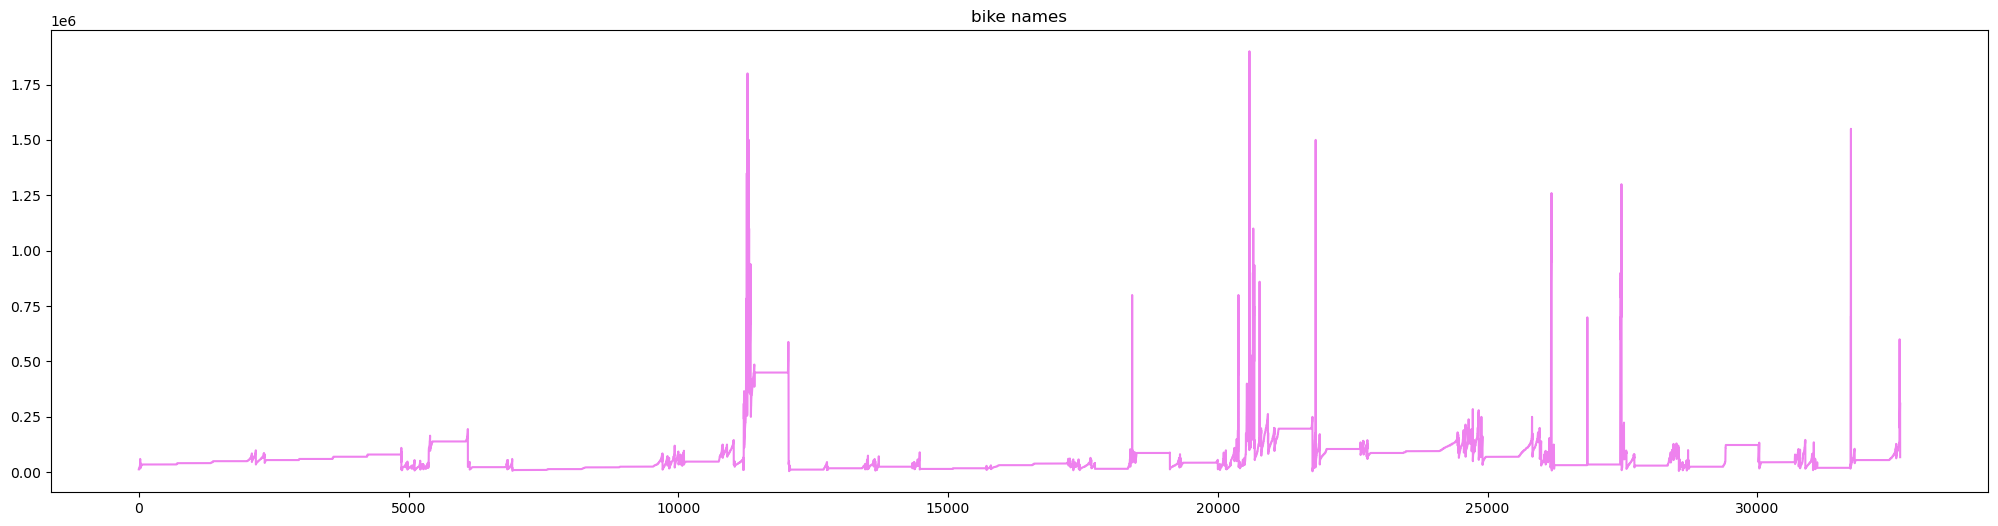

In [5]:
plt.figure(figsize=(25,6))
plt.plot(df['model price'], color='violet')
plt.title("bike names")
plt.xlable('cc')
plt.ylable('model price')
plt.plot()

In [10]:
df['model price'].isnull().sum()

np.int64(0)

In [12]:
df=df.interpolate(method='linear')

C:\Users\Dell\AppData\Local\Temp\ipykernel_2816\2930226766.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate(method='linear')


In [11]:
df['model price'].isnull().sum()

np.int64(0)

In [12]:
from statsmodels.tsa.stattools import adfuller

In [14]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['model price'])

print(adf[0])   # ADF Statistic
print(adf[1])   # p-value
print(adf[2])   # number of lags used
print(adf[4])   # critical values


-7.8080361875181135
7.193382375033764e-12
43
{'1%': np.float64(-3.4305505832081806), '5%': np.float64(-2.861628652616214), '10%': np.float64(-2.566817187037022)}


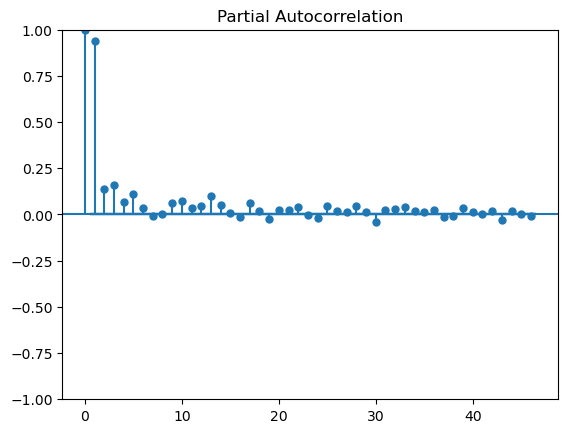

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['model price'])
plt.show()


In [ ]:
#p=1 , q=0 

In [16]:
n=int(len(df)*0.8)
train=df.iloc[:n]
test=df.iloc[n:]

In [18]:
model=ARIMA(train['model price'], order=(1, 0, 0)).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            model price   No. Observations:                26118
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -306483.576
Date:                Sat, 22 Nov 2025   AIC                         612973.151
Time:                        15:12:55   BIC                         612997.663
Sample:                             0   HQIC                        612981.068
                              - 26118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.157e+04   5103.252     14.023      0.000    6.16e+04    8.16e+04
ar.L1          0.9456      0.000   2910.498      0.000       0.945       0.946
sigma2      9.121e+08     62.378   1.46e+07      0.000    9.12e+08    9.12e+08
===================================================================================
Ljung-Box (L1) (Q):                1051.01   Jarque-Bera (JB):        1877966783.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             125.36   Skew:                             7.05
Prob(H) (two-sided):                  0.00   Kurtosis:                      1316.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+19. Standard errors may be unstable.
"""

In [20]:
model=ARIMA(train['model price'], order=(1, 0, 1)).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            model price   No. Observations:                26118
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -305512.995
Date:                Sat, 22 Nov 2025   AIC                         611033.990
Time:                        15:13:16   BIC                         611066.672
Sample:                             0   HQIC                        611044.546
                              - 26118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.157e+04   1.95e-11   3.67e+15      0.000    7.16e+04    7.16e+04
ar.L1          0.9792      0.000   4746.827      0.000       0.979       0.980
ma.L1         -0.3652      0.001   -644.844      0.000      -0.366      -0.364
sigma2      8.563e+08   2.92e-13   2.94e+21      0.000    8.56e+08    8.56e+08
===================================================================================
Ljung-Box (L1) (Q):                  97.48   Jarque-Bera (JB):        1808233626.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             139.99   Skew:                            10.12
Prob(H) (two-sided):                  0.00   Kurtosis:                      1291.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.6e+36. Standard errors may be unstable.
"""

In [23]:
train_pred=model.fittedvalues

In [27]:
forecast_test = model.get_forecast(steps=len(test))

test_pred_mean = forecast_test.predicted_mean       # use .predicted_mean (property)
test_con_int = forecast_test.conf_int()             


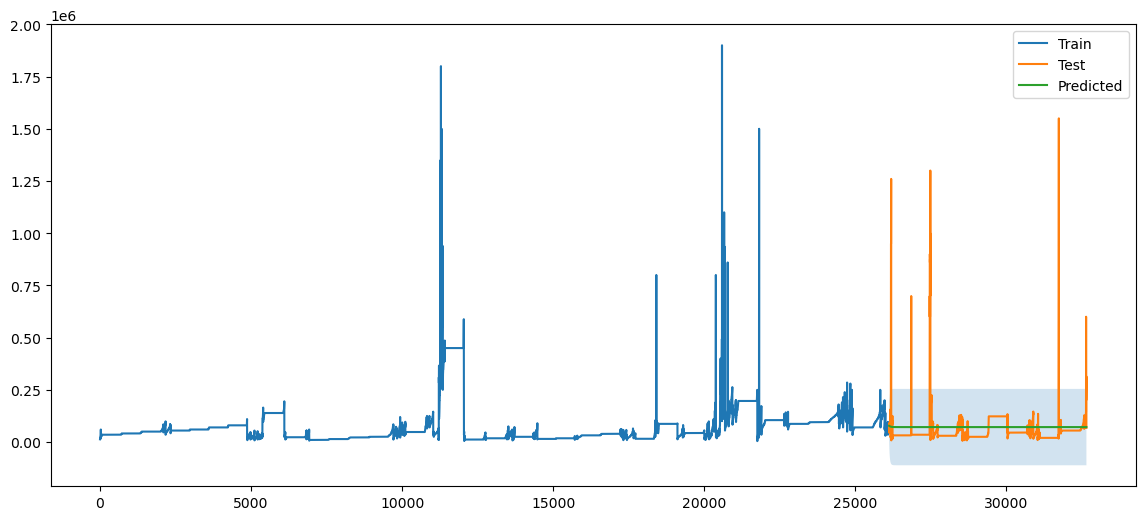

In [28]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train['model price'], label='Train')
plt.plot(test.index, test['model price'], label='Test')
plt.plot(test_pred_mean.index, test_pred_mean, label='Predicted')
plt.fill_between(test_pred_mean.index,
                 test_con_int.iloc[:, 0],
                 test_con_int.iloc[:, 1],
                 alpha=0.2)
plt.legend()
plt.show()


NameError: name 'future_mean' is not defined

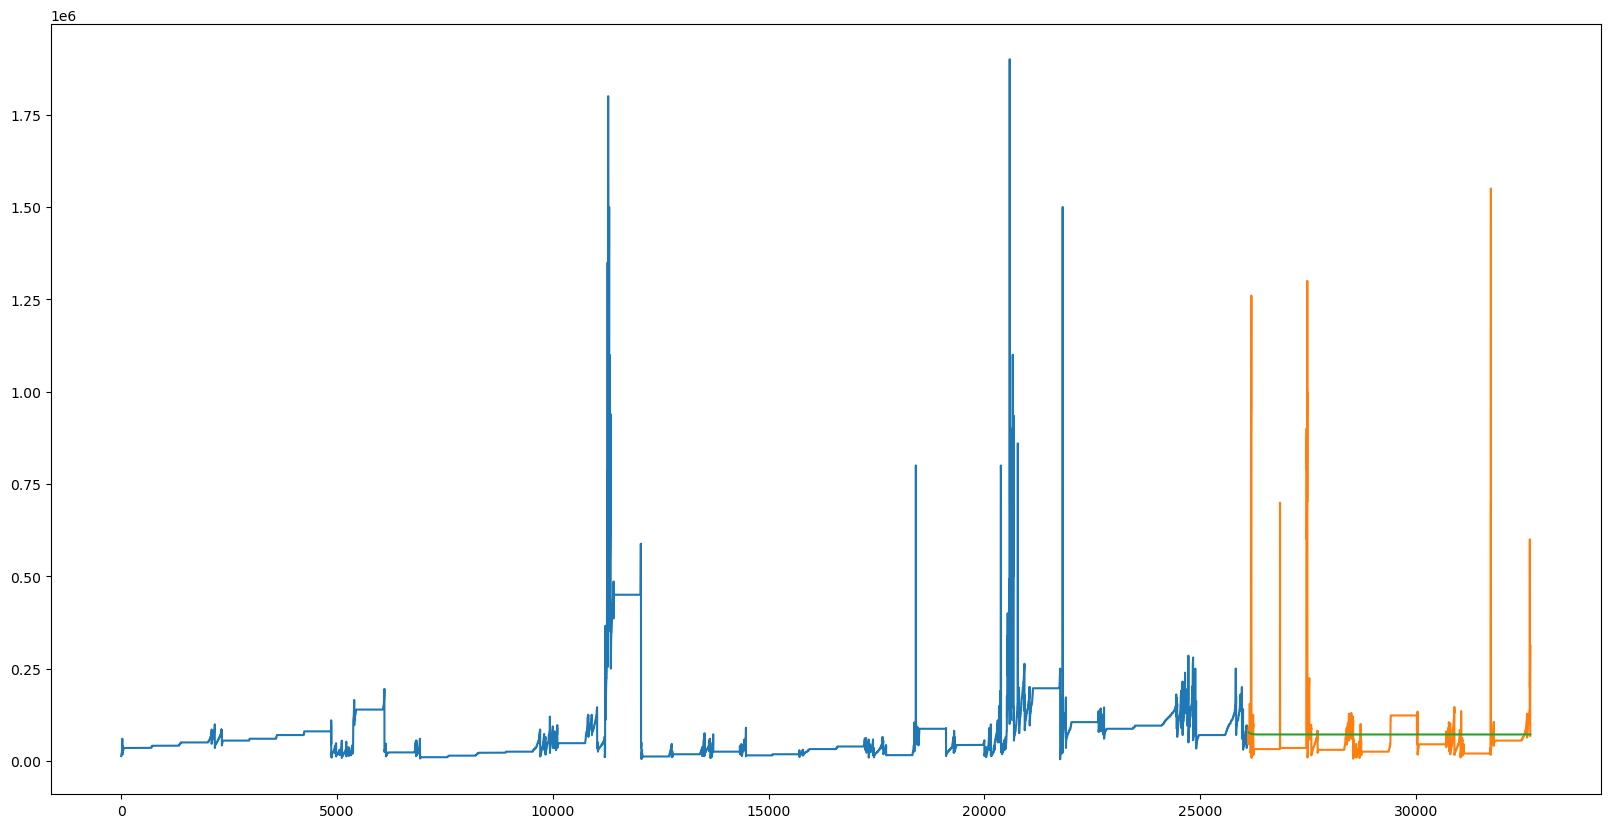

In [31]:
plt.figure(figsize=(20, 10))

# Plot train, test, forecast
plt.plot(train.index, train['model price'], label='Train')
plt.plot(test.index, test['model price'], label='Test')
plt.plot(test_pred_mean.index, test_pred_mean, label='Test Forecast')
plt.plot(future_mean.index, future_mean, label='Future Forecast')

# Plot confidence interval for future
plt.fill_between(
    future_conf.index,
    future_conf.iloc[:, 0],
    future_conf.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Future Confidence Interval'
)

plt.title("Model Price Forecast with Future Confidence Interval")
plt.xlabel("Date")
plt.ylabel("model Price")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'future_mean' is not defined

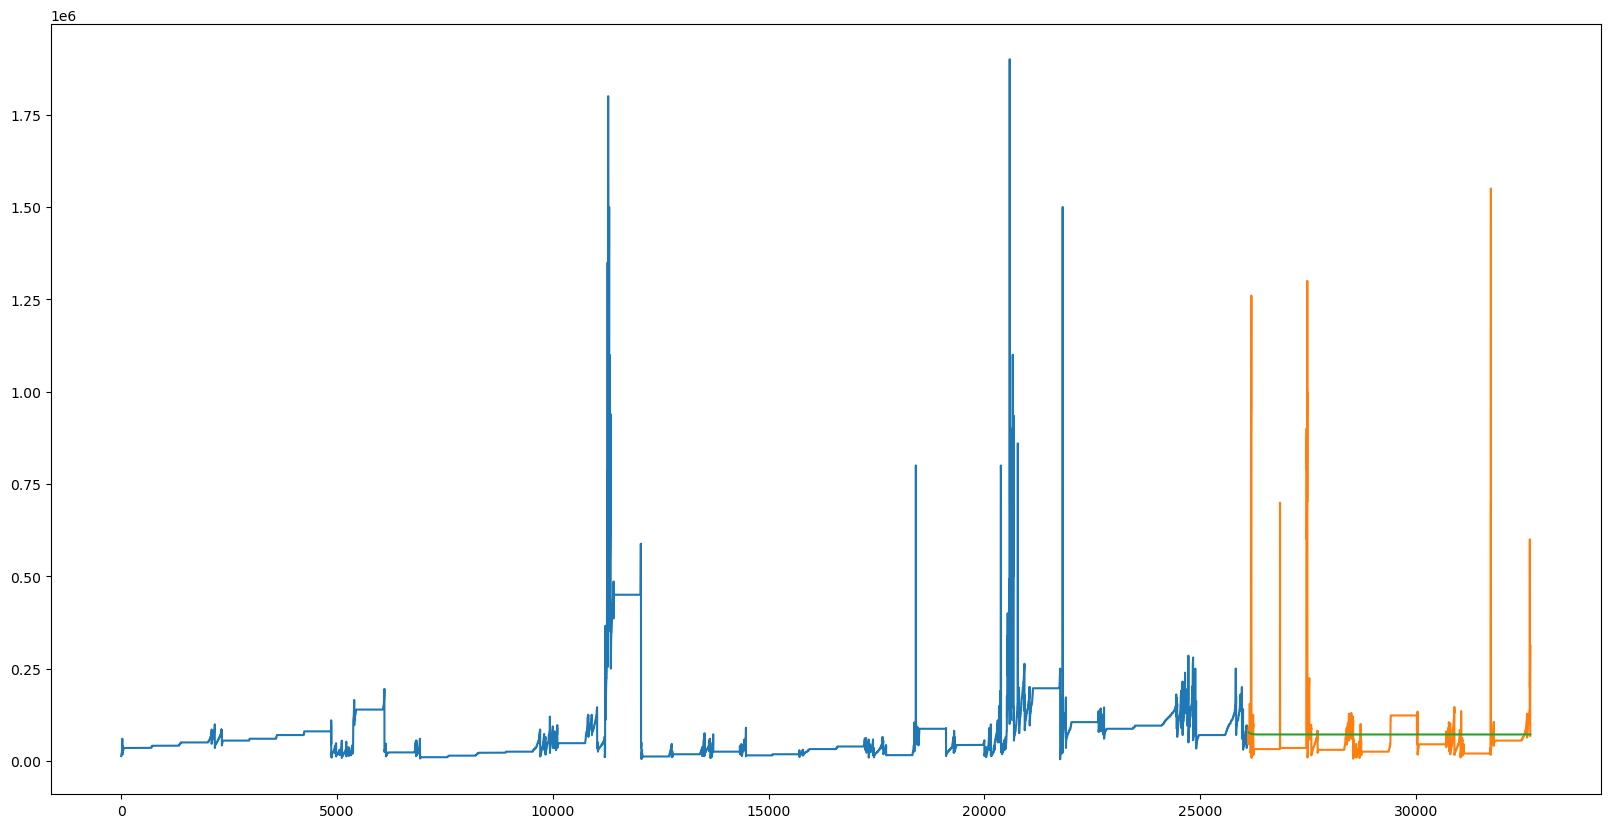

In [26]:
plt.figure(figsize=(20, 10))

plt.plot(train.index, train['model price'], label='Train')
plt.plot(test.index, test['model price'], label='Test')
plt.plot(test_pred_mean.index, test_pred_mean, label='Test Forecast')
plt.plot(future_mean.index, future_mean, label='Future Forecast')

plt.fill_between(
    future_conf.index,
    future_conf.iloc[:, 0],
    future_conf.iloc[:, 1],
    alpha=0.2,
    label='Future Confidence Interval'
)

plt.legend()
plt.show()


NameError: name 'future_mean' is not defined

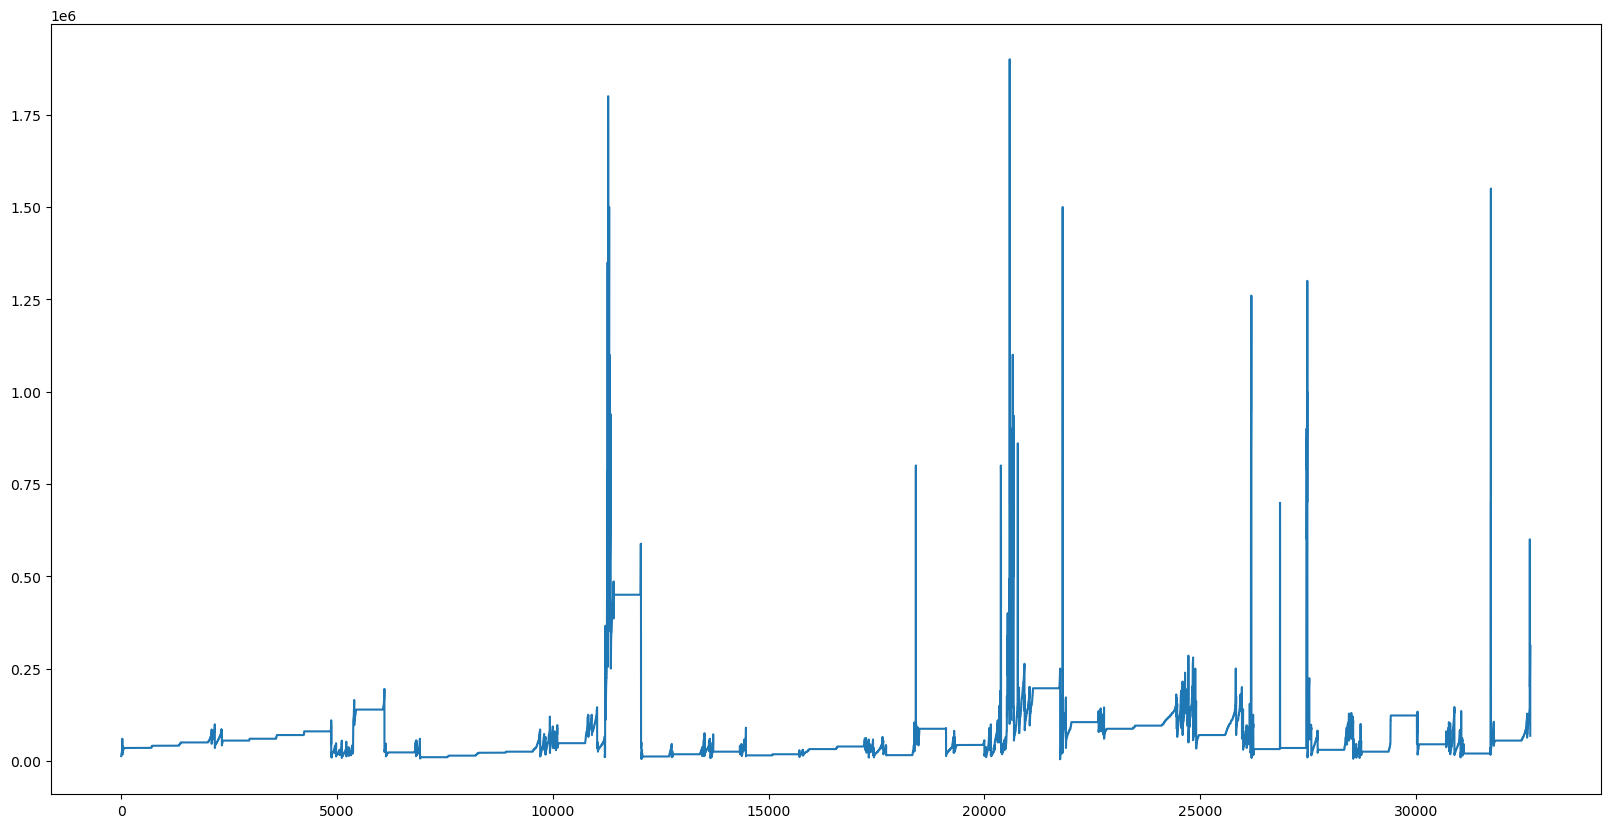

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['model price'], label='History')
plt.plot(future_mean.index, future_mean, label='Future Forecast')
plt.fill_between(future_conf.index,
                 future_conf.iloc[:, 0],
                 future_conf.iloc[:, 1],
                 alpha=0.2)
plt.legend()
plt.show()


In [35]:
print(forecast_test)

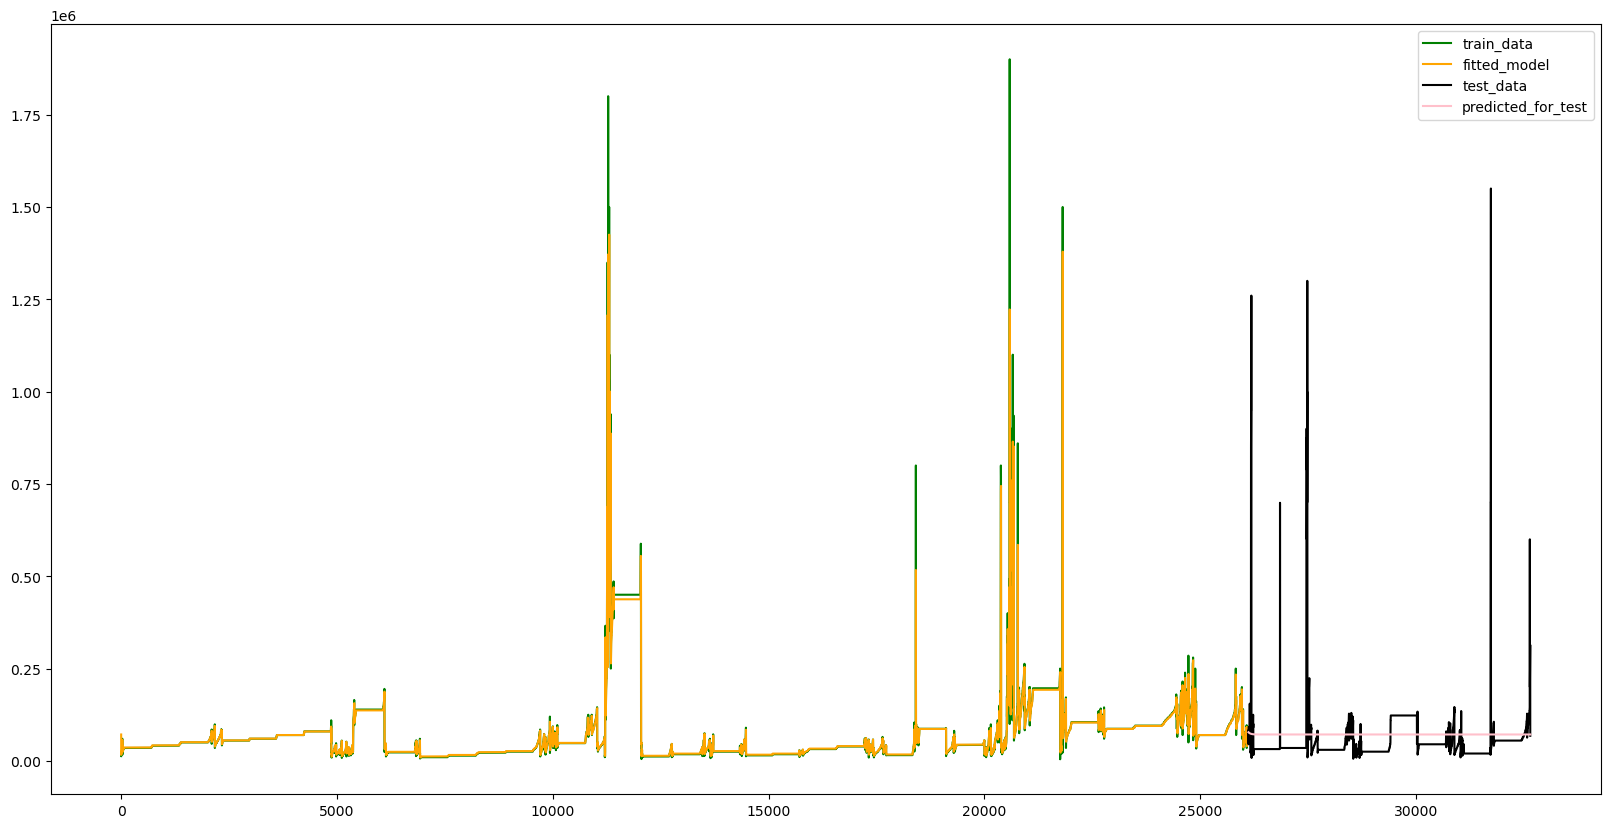

In [36]:
plt.figure(figsize=(20, 10))

plt.plot(train.index, train['model price'], label='train_data', color='green')
plt.plot(train_pred.index, train_pred, label='fitted_model', color='orange')

plt.plot(test.index, test['model price'], label='test_data', color='black')
plt.plot(test_pred_mean.index, test_pred_mean, label='predicted_for_test', color='pink')

# future forecast (optional)
# plt.plot(future_index, future_mean, label='future_forecast', color='blue')

plt.legend()
plt.show()
